In [4]:
pip install plotly

     |████████████████████████████████| 11.5MB 2.8MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=840cb6f319b49068766d6dc197d98aa2a11b291799e67703bb59ab2b143042f9
  Stored in directory: /Users/panthdesai/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install plotly-geo

     |████████████████████████████████| 23.7MB 462kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

import sqlite3 as sql

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, roc_auc_score

In [7]:
pd.set_option('display.max_columns',100)

In [8]:
import os

In [9]:
conn = sql.connect("/Users/panthdesai/Downloads/FPA_FOD_20170508.sqlite")

In [13]:
data = pd.read_sql("Select * from fires",con= conn)

In [14]:
data.shape

(1880465, 39)

In [15]:
data.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [16]:
data.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [19]:
epoch = pd.to_datetime(0, unit='s').to_julian_date()
data['CONT_DATE'] = pd.to_datetime(data['CONT_DATE'] - epoch, unit='D')
data['DISCOVERY_DATE'] = pd.to_datetime(data['DISCOVERY_DATE'] - epoch, unit = 'D')
data['FIRE_DURATION'] = data['CONT_DATE'] - data['DISCOVERY_DATE']
data['FIRE_DURATION'] = data['FIRE_DURATION'].dt.days
data['FIRE_DURATION'].fillna(data['FIRE_DURATION'].mean(),inplace = True)
data['FIRE_DURATION'] = data['FIRE_DURATION'].apply(lambda x : int(x))

In [20]:
data.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,FIRE_DURATION
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2005-02-02,33,1300,9.0,Miscellaneous,2005-02-02,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,0
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2004-05-12,133,0845,1.0,Lightning,2004-05-12,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,0
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2004-05-31,152,1921,5.0,Debris Burning,2004-05-31,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,0
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2004-06-28,180,1600,1.0,Lightning,2004-07-03,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,5
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2004-06-28,180,1600,1.0,Lightning,2004-07-03,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,5


## Fire occurence over a period of time


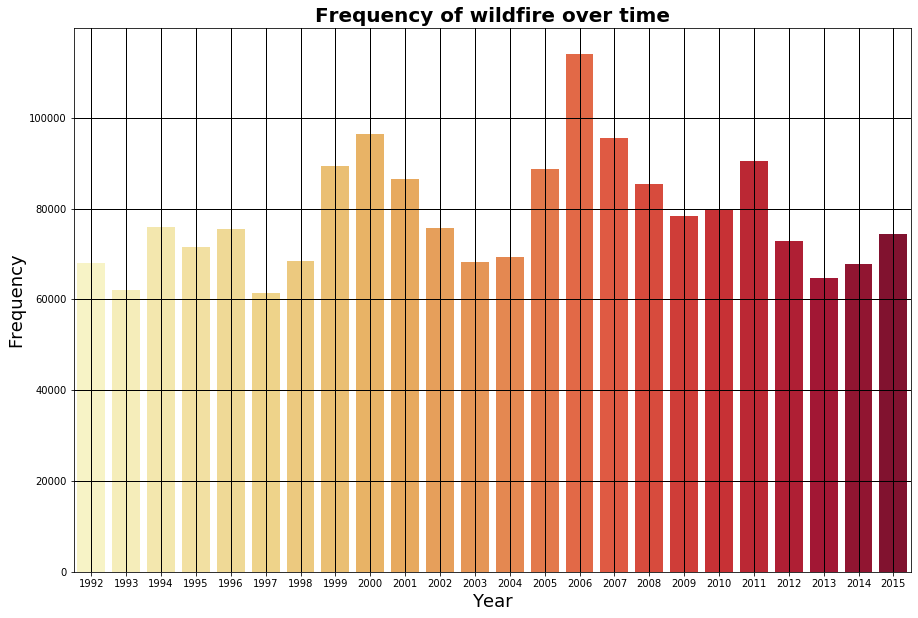

In [21]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="FIRE_YEAR", data = wfdf, palette="YlOrRd")
ax.set_title("Frequency of wildfire over time", fontdict = {'fontsize':20, 'fontweight':'bold'})
ax.set_xlabel("Year", fontdict = {'fontsize':18, 'fontweight': 'medium'})
ax.set_ylabel("Frequency", fontdict = {'fontsize':18, 'fontweight': 'medium'})
ax.grid(which = 'major',color = 'black', linewidth = 1)

## Causes of wildfire

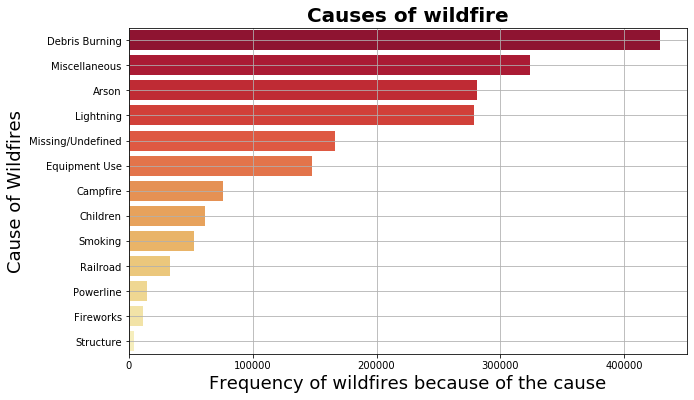

In [22]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'STAT_CAUSE_DESCR', data = wfdf, palette = 'YlOrRd_r', order=wfdf['STAT_CAUSE_DESCR'].value_counts().index)
ax.set_ylabel('Cause of Wildfires', fontdict = {'fontsize':18, 'fontweight': 'medium'})
ax.set_xlabel('Frequency of wildfires because of the cause', fontdict = {'fontsize':18, 'fontweight': 'medium'})
ax.set_title('Causes of wildfire', fontdict = {'fontsize':20, 'fontweight': 'bold'})
ax.grid()

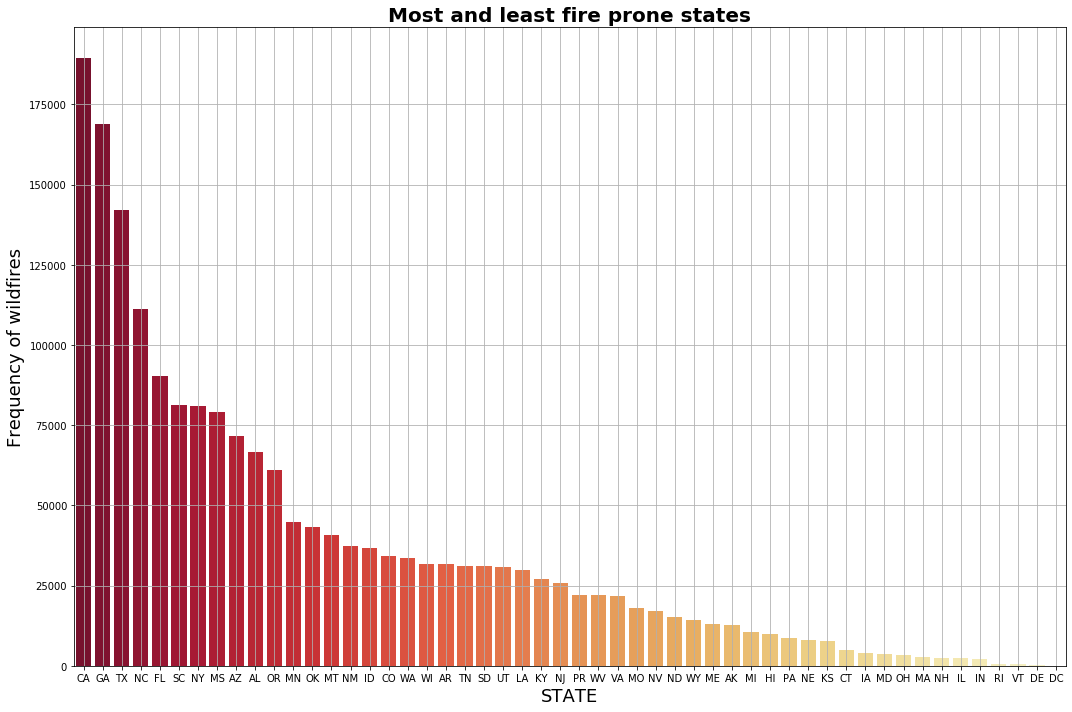

In [24]:
plt.figure(figsize = (15,10))
ax = sns.countplot(x = 'STATE' , data = wfdf, palette = 'YlOrRd_r', order = wfdf['STATE'].value_counts().index)
ax.set_ylabel('Frequency of wildfires', fontdict = {'fontsize':18, 'fontweight': 'medium'})
ax.set_xlabel('STATE', fontdict = {'fontsize':18, 'fontweight': 'medium'})
ax.set_title('Most and least fire prone states', fontdict = {'fontsize':20, 'fontweight': 'bold'})
ax.grid()
plt.tight_layout()

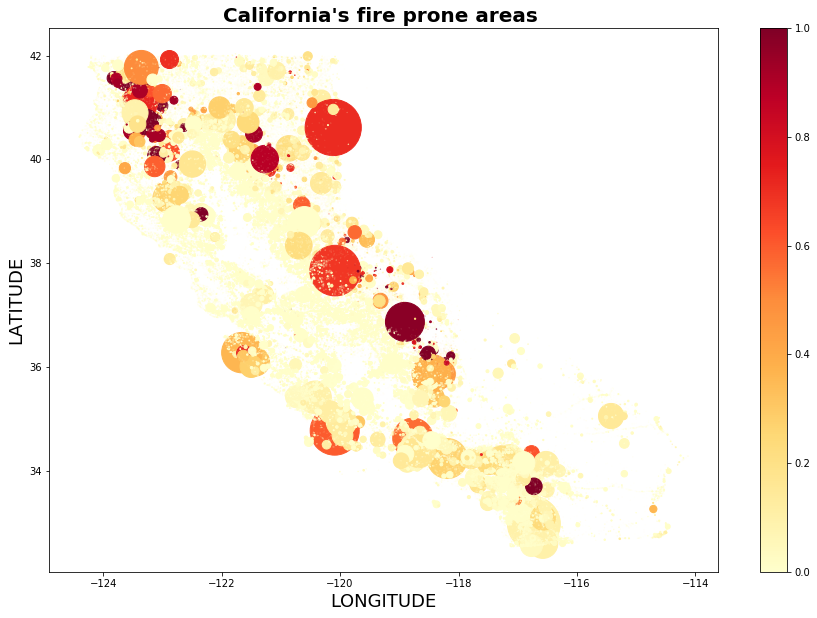

In [25]:
ca_data = wfdf[wfdf['STATE'] == 'CA']
plt.figure(figsize=(15,10))
plt.scatter(x = ca_data['LONGITUDE'],y = ca_data['LATITUDE'],sizes = ca_data['FIRE_SIZE']/100,c = ca_data['FIRE_DURATION']/100, cmap='YlOrRd', vmin=0.0, vmax=1.0)
plt.colorbar()
plt.xlabel('LONGITUDE', fontdict={'fontsize' : 18, 'fontweight' : 'medium'})
plt.ylabel('LATITUDE', fontdict={'fontsize' : 18, 'fontweight' : 'medium'})
plt.title("California's fire prone areas ",fontdict={'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()